<a href="https://colab.research.google.com/github/narchitect/NUS_Data-Science/blob/main/Exercise_4_1_Pandas_Stats_and_Viz_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science for Construction, Architecture and Engineering

## Section 4 - Operations - Pandas Statistics and Visualization

### Exercise Set 4.1 - Pandas Stats and Viz I

This set of exercises is related to the first half of Section 4 videos. Using the same data (ASHRAE Thermal Comfort Database II) and packages (Pandas) as in the videos, we learned how to use `groupby`, `pivot_table` and basic plots, and applied these techniques in the thermal comfort database.

There is an introduction video available to explain the process of using this exercise video.

The lead developer of this exercise is Chun Fu, a Ph.D. student at NUS and a teaching assistant of this course. 


#### Setup the environment

Let's set up the environment and read the data first:

In [4]:
# Import packages
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set path for data source
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/EDX Data Science for Construction, Architecture and Engineering/4 - Operations - Statistics and Visualization/")

Mounted at /content/gdrive


In [3]:
# Load thermal comfort database
ieq_data = pd.read_csv("ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

Among the parameters (or columns) of this database, **Air temperature (C)** is an essential parameter for evaluating a thermal environment, which could be affected by many factors, such as weather or air conditioning. So, in the following example and exercises, you will be asked questions about **Air temperature (C)**.

For example (as shown in the graph below), we can observe that the **Air temperature (C)** has significantly different distributions (based on the `boxplots`) under different cooling strategies. A simple take away could be that **Air temperature (C)** in **naturally ventilated** environments are higher, on average, than **air conditioned** ones, which means that naturally ventilated environments are, on average, warmer (at least according to the database).

In [30]:
# Boxplot for Thermal sensation under different cooling strategies
ieq_data[['Air temperature (C)','Cooling startegy_building level']].groupby('Cooling startegy_building level').boxplot(figsize=(10,10))

,Year,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
Cooling startegy_building level,,,,,,,,
Air Conditioned,1994.0,0.0,0.62,1.19,23.4,49.5,0.10,0.0
Mechanically Ventilated,1999.0,0.0,0.76,1.40,22.8,42.1,0.04,0.0
Mixed Mode,2012.0,0.0,0.66,1.00,25.5,51.4,0.10,0.0
Naturally Ventilated,2007.0,0.0,0.51,1.20,26.5,56.4,0.17,0.0


## Exercise 04.1.1 - Draw a boxplot for each building type

In this first exercise, you are asked to do a similar analysis of the data from the ASHRAE Thermal Comfort Database II to understand the different distributions of **Air temperature (C)** for each **building type** by using boxplots for analysis.

By looking at the **Air temperature (C)** `median` of each **building type**. What is their order, if we were to sort them from high to low?

The correct answer is one of the following choices:
1. Multifamily housing > Senior center > Classroom > Office > Others 
2. Multifamily housing > Senior center > Office > Others > Classroom

(A) 3. Multifamily housing > Classroom > Office > Others > Senior center
4. Classroom > Multifamily housing > Senior center > Office > Others

Have in mind that `median` is represented as the middle line of the box body in the boxplot figure.

In [6]:
ieq_data.head()

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
2233,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2234,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-1.0,0.64,1.0,25.2,64.0,0.1,-1.0
2235,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-2.0,0.64,1.0,25.2,64.0,0.1,-2.0
2236,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2237,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.0,25.2,64.0,0.1,0.0


Building type
Classroom              AxesSubplot(0.125,0.125;0.775x0.755)
Multifamily housing    AxesSubplot(0.125,0.125;0.775x0.755)
Office                 AxesSubplot(0.125,0.125;0.775x0.755)
Others                 AxesSubplot(0.125,0.125;0.775x0.755)
Senior center          AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

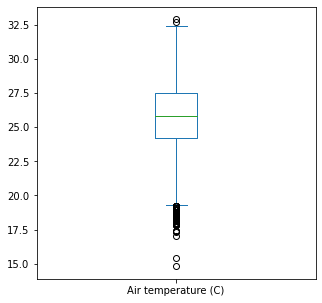

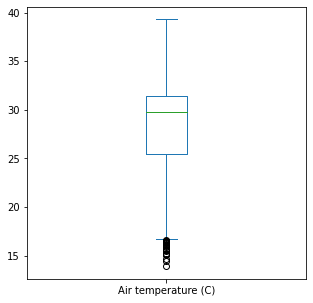

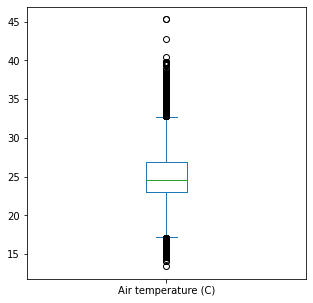

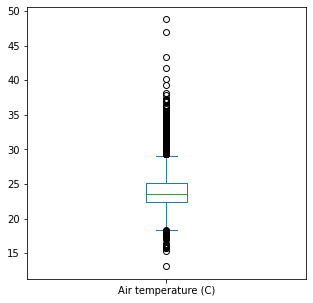

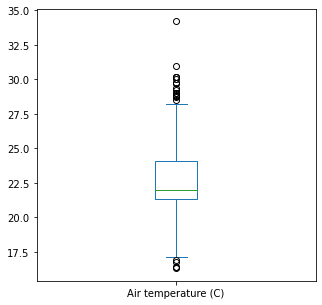

In [38]:
# Boxplot for "Air temperature (C)" under different building types
grouped_ieq_data = ieq_data[['Air temperature (C)', 'Building type']].groupby("Building type")
grouped_ieq_data.plot.box(figsize = (5,5))

In [40]:
medians = grouped_ieq_data['Air temperature (C)'].median()
medians

Building type
Classroom              25.8
Multifamily housing    29.8
Office                 24.5
Others                 23.5
Senior center          22.0
Name: Air temperature (C), dtype: float64

## Exercise 04.1.2 - Finding the median values for each building type

From the question above, we successfully compared different distributions and medians for each **building type**!

Sometimes, instead of a distribution comparison, we want to boil down the data to a single number, such as the **average** or **median**.

In this exercise, write code that finds the `median` values of all quantitative columns in the `ieq_data` DataFrame for each of the **building type** (Office, Multifamily housing, Classroom, Senior center, and Others)

Regarding  **Air temperature (C)**, try to find the maximum value in the median of each **building type** (For example, the **building type A** has the highest median value of **Air temperature (C)**, then this value is the answer).



In [44]:
# There is a Pandas function that enables you to do this in a *single line of code*
ieq_data.groupby('Building type').median()
# YOUR CODE HERE 


,Year,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
Building type,,,,,,,,
Classroom,2010.0,0.0,0.46,1.2,25.8,61.2,0.20,0.0
Multifamily housing,2011.0,0.0,0.38,1.0,29.8,60.4,0.25,0.0
Office,2010.0,0.0,0.64,1.1,24.5,51.0,0.10,0.0
Others,1998.0,0.0,0.69,1.2,23.5,42.7,0.08,0.0
Senior center,2016.0,0.0,0.73,1.0,22.0,49.4,0.08,0.0


In [ ]:
answer = 'Multifamily housing'

## Exercise 04.1.3 - Calculate heat index and find the lowest average value - Advanced

The previous two questions look at only one parameter, **Air temperature (C)**, in our analysis -- what if we're interested in a more comprehensive index for evaluating thermal environment?

 **Heat index** , which includes both **Air temperature (C)** and **Relative humidity (%)** is a metric that simulates the real temperature people feel (e.g, higher humidity would make people feel warmer). 

In this exercise, try first to calculate the heat index based on **Air temperature (C)** and **Relative humidity (%)**, then work out the **average heat index** for each **Cooling startegy_building level** in each **Building type** (rounded to two decimal places). Finally, provide the **lowest** value among them as your answer (e.g., the lowest value **xx.xx** may come from **Cooling startegy_building level A** in **Building type B**).


Here is a short introduction of **heat index**:

The **heat index**, also known as the apparent temperature, is an index that combines **air temperature** and **relative humidity** to reflect what the temperature feels like to the human body. For example, people usually feel warmer under higher humidity, even at the same temperature.

The **heat index** is calculated from the following formula:

$\displaystyle \mathrm {HI} =c_{1}+c_{2}T+c_{3}R+c_{4}TR+c_{5}T^{2}+c_{6}R^{2}+c_{7}T^{2}R+c_{8}TR^{2}+c_{9}T^{2}R^{2}$

where
- HI = heat index (in degrees Celsius)
- T = ambient dry-bulb temperature (in degrees Celsius)
- R = relative humidity (percentage value between 0 and 100)
- c1 = -8.78469475556
- c2 = 1.61139411
- c3 = 2.33854883889
- c4 = -0.14611605
- c5 = -0.012308094
- c6 = -0.0164248277778
- c7 = 0.002211732
- c8 = 0.00072546
- c9 = -0.000003582

Here's an example for calculating heat index from `Air temperature (C)` (28 degC) and `Relative humidity (%)` (90%):

$\displaystyle \mathrm {T} = 28$

$\displaystyle \mathrm {R} = 90$

$\displaystyle \mathrm {HI} =c_{1}+c_{2}T+c_{3}R+c_{4}TR+c_{5}T^{2}+c_{6}R^{2}+c_{7}T^{2}R+c_{8}TR^{2}+c_{9}T^{2}R^{2}=33.75$

In [48]:
# Calculate heat index and assign to a new column 'HI'
# YOUR CODE HERE
c1 = -8.78469475556
c2 = 1.61139411
c3 = 2.33854883889
c4 = -0.14611605
c5 = -0.012308094
c6 = -0.0164248277778
c7 = 0.002211732
c8 = 0.00072546
c9 = -0.000003582

T = ieq_data['Air temperature (C)']
R = ieq_data['Relative humidity (%)']

ieq_data['HI'] = c1+(c2*T)+(c3*R)+(c4*T*R+c5*T**2)+(c6*R**2)+(c7*T**2*R)+(c8*T*R**2)+(c9*T**2*R**2)
ieq_data.tail()

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded,HI
104027,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,2.3,0.45,1.20,24.7,31.4,0.21,2.0,25.301605
104030,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,2.0,0.42,1.40,25.2,30.2,0.12,2.0,25.466191
104031,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,0.2,0.53,1.25,25.4,29.3,0.14,0.0,25.524441
104032,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,1.0,0.57,1.27,25.3,30.1,0.23,1.0,25.507322
104033,"Cena, K. and de Dear, R. (1999) ""Field Study o...",1997.0,Summer,Hot semi-arid,Kalgoorlie,Australia,Office,Air Conditioned,Female,1.0,0.44,1.37,25.3,29.7,0.13,1.0,25.493009


In [50]:
# Use groupby() or pivot_table() function aggregated by mean(), and find the lowest value among aggregated values
# YOUR CODE HERE
ieq_data_pivoted = ieq_data.pivot_table(index = 'Cooling startegy_building level', columns = 'Building type', values = 'HI', aggfunc='mean')

In [51]:
ieq_data_pivoted.mean

Building type,Classroom,Multifamily housing,Office,Others,Senior center
Cooling startegy_building level,,,,,
Air Conditioned,26.347059,NaN,25.385532,25.129141,NaN
Mechanically Ventilated,NaN,NaN,25.266683,25.184372,NaN
Mixed Mode,27.423482,32.308275,27.201374,26.275202,25.525617
Naturally Ventilated,27.779182,32.167722,28.912450,26.328272,NaN


### **Please note that you will need to use the resultant output (a two-digit value with two decimal places) from Exercise 04.1.3 for the Quiz 4.1.**

In [59]:
round(25.129141, 2)

25.13